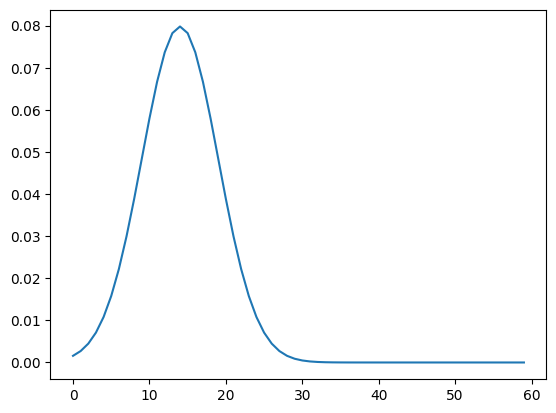

In [231]:
import random

# Code adapted https://www.geeksforgeeks.org/how-to-plot-a-normal-distribution-with-matplotlib-in-python/
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm 
import statistics 
  
# Plot between -10 and 10 with .001 steps. 
x_axis = np.arange(0, 60, 1) 
  
# Calculating mean and standard deviation 
mean = 14
sd = 5

y_axis =  norm.pdf(x_axis, mean, sd)

plt.plot(x_axis, y_axis) 
plt.show()

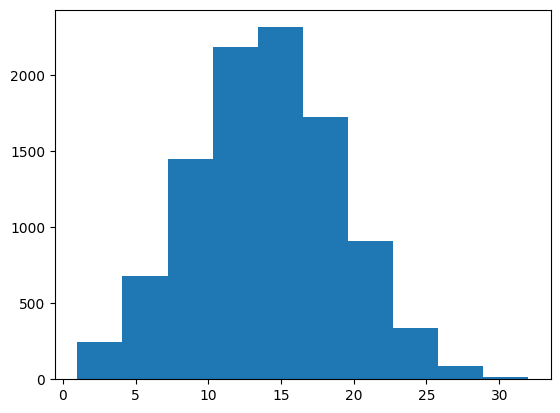

In [232]:
import math 

rows = 10000

waitingTimeColumn = []

for x in range(1,len(x_axis)):
    
    # Number of mocks at targeted year
    n = math.floor(rows * y_axis[x])
    vals = [x] * n
    
    # Adds it to the column for waitingTimeColumn
    waitingTimeColumn.extend(vals) 

plt.hist(waitingTimeColumn)
plt.show()

In [233]:
#https://en.wikipedia.org/wiki/Heap%27s_algorithm

sex = ["m", "f"]
# 
age = [*range(16,70+1)]
minBedSize = [*range(1,5+1)]
maxBedSize = [*range(1,5+1)]
medicalRequirements = ["none", "pregnant"]
decant = [1 , 0]
ahrCode = [*range(1,7+1)]




In [234]:
x_axis = np.arange(-0, 60, 1) 

from sklearn.preprocessing import normalize


# # Sex [F , M]
# means = [10, 12]
# sds = [6, 7]
# y_axi_data = []
# for x in range(0,2):
#     mean = means[x]
#     sd = sds[x]
#     plt.plot(x_axis, y_axis) 
# for x in range(0,len(y_axi_data[0])):
#     for y in range(0,len(y_axi_data)):
#         y_axi_data
#     
# 
# plt.show()

class FeatureModel:
    def __init__(self,feature_names, means, sds):
        self.feature_names = feature_names
        self.means = means
        self.sds = sds
        
        x_axis = np.arange(-0, 60, 1) 
        self.feature_probabilities = []
        
        # Sets up the normal distribution of the probabilities
        for x in range(len(feature_names)):
            self.feature_probabilities.append(norm.pdf(x_axis, means[x], sds[x]))
    
    
    # Gets the weight of all features given the year
    def get_probabilities(self, year):
        output = []
        for x in range(len(self.feature_names)):
            output.append(self.feature_probabilities[x][year])
            
        return output
    
    def get_graph(self):
        x_axis = np.arange(-0, 60, 1) 
        plt.clf()
        for x in range(len(self.feature_names)):
            y_axis = self.feature_probabilities[x]
            plt.plot(x_axis, y_axis)
        plt.legend(self.feature_names)
        plt.show()
        
    def get_feature_names(self):
        return self.feature_names
    
    def get_weights(self):
        return self.weights
            

class Model:
    def __init__(self, featureModel: FeatureModel):
        self.featureModel = featureModel
    
    # Gets a random feature given the year.
    def get_feature(self, year):
        dist = self.featureModel.get_probabilities(year)
        features = self.featureModel.get_feature_names()
        # print(dist)
        dist_norm = normalize([dist], norm="l1")[0]
        # print(dist_norm)
        # print(sum(dist_norm))
        # print(np.random.choice(features, size=1, p=dist_norm)[0])
        
        return np.random.choice(features, size=1, p=dist_norm)[0]
        
        

    
        

In [235]:
sexModel = FeatureModel(["m", "f"], [12,10], [6,7])
# sexModel.get_graph()

minBedSizeModel = FeatureModel([1,2,3,4,5], [4,11,12,17,32], [10,10,11,14,10])
# minBedSizeModel.get_graph()
#
maxBedSizeModel = FeatureModel([1,2,3,4,5], [4,11,11,16,30], [6,7,8,9,10])
# maxBedSizeModel.get_graph()

decantModel = FeatureModel([True,False], [15,20], [100,100])
# decantModel.get_graph()

test = Model(sexModel).get_feature(30)



In [236]:
# x_axis = np.arange(0, 60, 1) 
# 
# # age
# ages = [*range(0,60)]
# means = [norm.pdf(ages, 30, 10)*60]
# sds = [40] * 60
# weights = [0.51, 0.49]
# for x in range(0,60):
#     print(x)
#     mean = means[x]
#     sd = sds[x]
#     y_axis =  norm.pdf(x_axis, mean, sd)
#     plt.plot(x_axis, y_axis) 
# plt.show()

In [238]:

sexModelGen = Model(sexModel)
ageModel = None # We randomising for now
minBedModelGen = Model(minBedSizeModel)
maxBedModelGen = Model(maxBedSizeModel)
medicalReqModel = None # we using flat dist for now
isDecantModelGen = Model(decantModel)
ahrCode = None # using flat dist for now


finalData = []
for x in range(len(waitingTimeColumn)):
    year = waitingTimeColumn[x]
    
    sex = sexModelGen.get_feature(year)
    age = random.randint(18,60)
    minBedSize = minBedModelGen.get_feature(year)
    maxBedSize = maxBedModelGen.get_feature(year)
    medicalRequirements = np.random.choice(["none", "pregnant"], size=1, p=[0.997, 0.003])
    isDecant = isDecantModelGen.get_feature(year)
    ahrCode = np.random.choice([1,2,3,4,5,6,7], size=1, p=[0.02, 0.03, 0.05 ,0.10, 0.20,0.4,0.2])
    
    finalData.append([sex,age,minBedSize,maxBedSize,medicalRequirements, isDecant,ahrCode])

df = pd.DataFrame(finalData, columns=["sex", "age", "minimumBedSize", "maximumBedSize", "medicalRequirements", "isDecant", "ahrCode"])
df.to_csv('data.csv', index_label=False)

    